# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 5 - Random Walk

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Random Walk

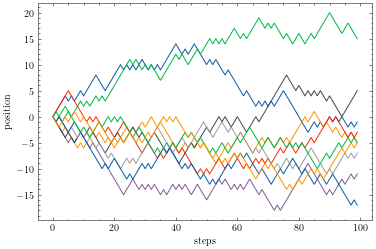

In [2]:
np.random.seed(0) # For reproducibility

N = 100 # steps
M = 10 # walkers
p = 0.5 # probability
a = 1.0 # step size

x = np.zeros((N, M))

for m in range(M):
    for n in range(N-1):
        if np.random.rand() >= p:
            x[n+1, m] = x[n, m] + a
        else:
            x[n+1, m] = x[n, m] - a
            
# Plotting

plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

In [3]:
# Making it a function

def random_walk_1d(N, M, p=0.5, a=1.0):
    x = np.zeros((N, M))

    for m in range(M):
        for n in range(N-1):
            if np.random.rand() >= p:
                x[n+1, m] = x[n, m] + a
            else:
                x[n+1, m] = x[n, m] - a
    
    return x

In [4]:
# Getting some statistics

x = random_walk_1d(1000, 1000, p=0.5, a=1.0)

x_mean = np.mean(x[-1, :])
x2_mean = np.mean(x[-1, :]**2)

In [5]:
x2_mean

1021.216

In [6]:
4*p*(1-p)*N*(a**2)

100.0

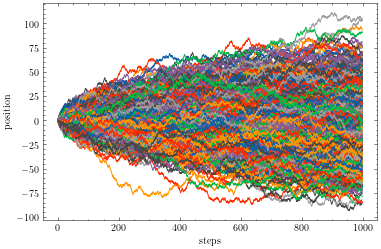

In [7]:
plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

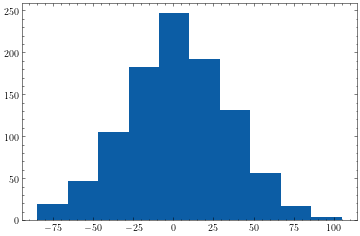

In [8]:
plt.hist(x[-1, :])
plt.show()

In [9]:
## Binomial distribution

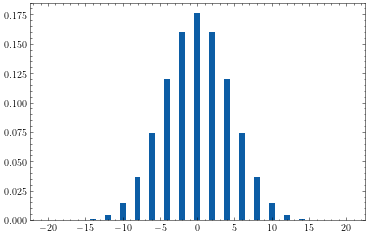

In [34]:
from math import factorial

def binomial(N, m, p=0.5):
    q = 1-p
    n1 = 0.5*(N+m)
    n2 = 0.5*(N-m)
    omega = (factorial(N))/(factorial(n1)*factorial(n2))
    return omega*(p**n1)*(q**n2)

N = 20
m_values = [m for m in np.arange(-N, N+1, 1) if m%2 == 0]
P = [binomial(N, m) for m in m_values]

plt.bar(m_values, P)
plt.show()
    

In [29]:
P

[9.5367431640625e-07,
 1.9073486328125e-05,
 0.0001811981201171875,
 0.001087188720703125,
 0.004620552062988281,
 0.0147857666015625,
 0.03696441650390625,
 0.0739288330078125,
 0.12013435363769531,
 0.16017913818359375,
 0.17619705200195312,
 0.16017913818359375,
 0.12013435363769531,
 0.0739288330078125,
 0.03696441650390625,
 0.0147857666015625,
 0.004620552062988281,
 0.001087188720703125,
 0.0001811981201171875,
 1.9073486328125e-05,
 9.5367431640625e-07]

# 2D Random Walk

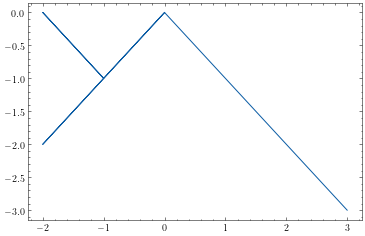

In [13]:
N = 10
M = 3
r = np.zeros((N, 2, M))

for m in range(M):
    for n in range(N-1):
        for coord in range(2):
            if np.random.rand() >= p:
                r[n+1, coord, m] = r[n, coord, m] + a
            else:
                r[n+1, coord, m] = r[n, coord, m] - a
            
        
plt.plot(r[:,0, 0], r[:,1, 0])

In [14]:
N = 10
r = np.zeros((N, 2))

for n in range(N-1):
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

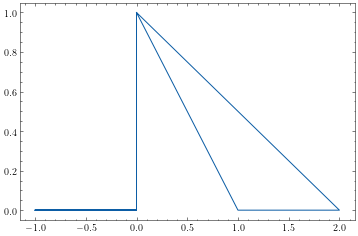

In [15]:
plt.plot(r[:, 0], r[:, 1])

In [16]:
for n in range(N-1):
    r = np.random.random() 
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

TypeError: 'float' object is not subscriptable

In [ ]:
for i in range(20):
    r = np.random.random()
    print(r)
    if r <= 0.25:
        print('left')
    elif 0.25 < r <= 0.5:
        print('right')
    elif 0.5 < r <= 0.75:
        print('up')
    elif 0.75 < r:
        print('down')